In [1]:
from primitive import *
import matplotlib.pyplot as plt
from pycapacity.human import force_polytope
from pycapacity.visual import plot_polytope
# from pycapacity.objects import Polytope
from pycapacity.algorithms import iterative_convex_hull_method
import numpy as np
from timeit import default_timer

## Convertion

## 1. Initial problem
Let $p\leq n \leq m \in \mathbb{N}$.

Consider a $n$-zonotope $\mathcal{Z}$ embedded in $\mathbb{R}^n$. From (Grünbaum, 2003), a zonotope is a specific type of centrally symmetric polytope: it can thus be described as the affine transformation of a $m$-dimensional unit hypercube $\mathcal{C}^m := [-1,1]^m$. Let's write $\mathcal{Z} = \psi(\mathcal{C}^m)$, with $\psi\colon \mathbf{R}^m\longrightarrow \mathbf{R}^n$ an affine transformation.

We consider a $p$-polytope $P\subset \mathbb{R}^m$ as a $n$-zonotope $\mathcal{Z} \subset \mathbb{R}^m$ sectionned by a $p$-vector space $V \subset \mathbf{R}^n$:
$$\mathcal{P} = V \cap \mathcal{Z} = V\cap \psi(\mathcal{C}^m)$$

Note: it is unsure that all polytopes can be written this way.
### Computation
If we know explicitely the matrix representation of $\psi$ as well as a linear basis of $V$, the \textit{Iterative Convex Hull} algorithm (Skuric et al., 2022) returns approximated vertices $v \in \mathcal{P}$ (up to some given tolerance) expressed in the basis of $V$. It returns as well the associated $x_v\in\delta\mathcal{C}^m$.

### Understanding the domain

This polytope writing can be simplified as the transformation of another polytope $\mathcal{P}'\subset \mathbf{R}^m$ via an affine transformation $\gamma\colon \mathbf{R}^m\longrightarrow \mathbf{R}^n$ such that:
$$\mathcal{P} = \gamma(\mathcal{P}')$$

#### Can we describe in more details $\mathcal{P}'$?
The answer is yes, and we have:
$$\mathcal{P}' = A\cap\mathcal{C}^m$$

With $A$ a $$-affine space

$$A := \bigcap_{i}$$

Let's $V = V_1 + V_2 + \dots + V_n$ such that $\text{dim}(V_i) = p$, for $i=1,\dots,n$.

With $A$ an affine space such that:

$$ A:= \bigcap_{i\neq j} \ker{(V^{-1}_{i}N_i - V^{-1}_{j}N_j)}$$

In [2]:
# def convert_as_cube_section(A, )

In [3]:
np.random.seed(40)

p, n, m = 3, 5, 6

V = np.random.uniform(-1,1, size=(n, p))
N, b = np.random.uniform(-5,10, size=(n, m)), np.random.uniform(-5,4, size=n)

V1 = V[:3, :]
V2 = V[2:, :]

N1 = N[:3, :]
N2 = N[2:, :]

K1 = np.linalg.inv(V1) @ N1
K2 = np.linalg.inv(V2) @ N2

B12 = ker(K1 - K2)
A = B12.matrix

x_min = -1*np.ones(m)
x_max = 1*np.ones(m)
P_ICH = force_polytope(V.T, N, x_min, x_max, torque_bias=-b, tol=0.001)
P_CS = force_polytope(A.T, np.identity(m), x_min + np.linalg.pinv(N)@b, x_max + np.linalg.pinv(N)@b, tol=0.001)
P_CS = SkuricPolytope(vertices = np.linalg.pinv(V) @ (N @ P_CS.muscle_force_vertices))

Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


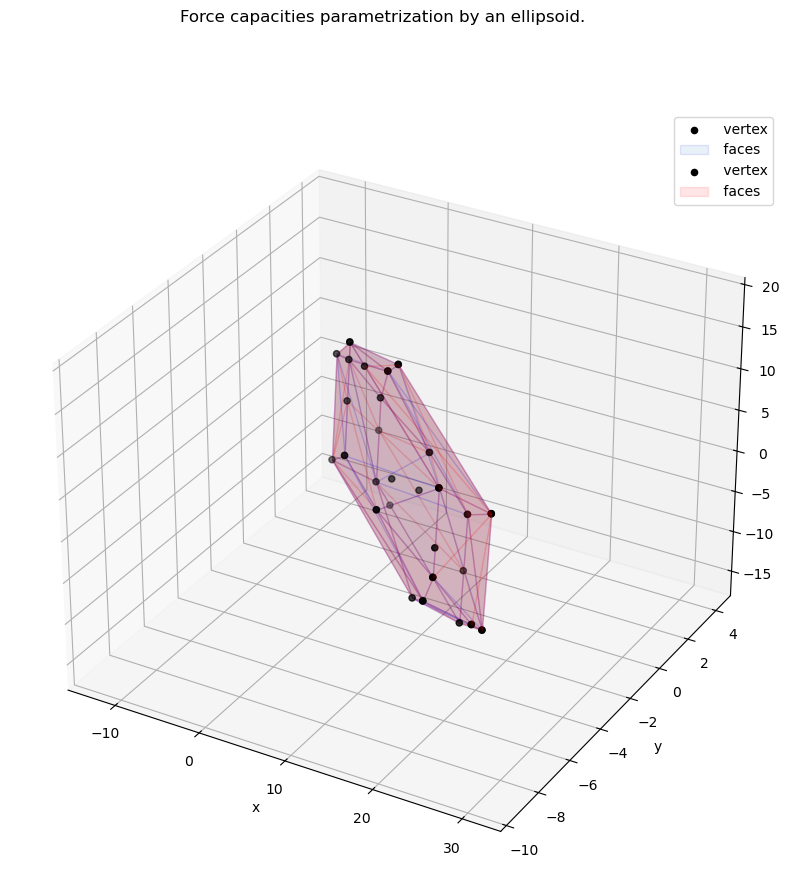

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P_ICH, plot=ax, edge_color="blue", alpha=0.1)
plot_polytope(polytope=P_CS, plot=ax, edge_color="red", face_color="red", alpha=0.1)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

In [11]:
K = B12
print(K.dim)
print(K.dim_domain)
print(K.dim_codomain)

4
4
6
